In [2]:
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt

df_start = pd.read_excel('./data/crimes-et-delits-enregistres-par-les-services-de-gendarmerie-et-de-police-depuis-2012.xlsx', sheet_name=1)
df_start.rename(columns={"Année 2012> - services de police": "ID", "Départements": "CrimeType"}, inplace=True)
df_start['Annee'] = 2012

In [3]:
for i in range(2,7):
    df = pd.read_excel('./data/crimes-et-delits-enregistres-par-les-services-de-gendarmerie-et-de-police-depuis-2012.xlsx', sheet_name=i)
    year = 2011 + i    
    col1 = "Année {} - services de police".format(2011+i)
    df.rename(columns={col1: "ID", "Départements": "CrimeType"}, inplace=True)
    df['Annee'] = year    
    df_start = pd.concat([df_start, df], ignore_index=True)

In [4]:
df_start.fillna(0, inplace=True)

In [5]:
indexName = df_start['Annee'] # Fetch the years in the dataframe
annee = indexName.drop_duplicates() # Delete all the duplicates
anneeFrame = annee.to_frame() # Convert the series to a dataframe
sumCrime = []
anneeFrame['Total'] = ''
for i in annee:
    dfAnnee = df_start.loc[df_start['Annee'] == i] # Fetch the dataframe for the year depending the variable
    dfTest = dfAnnee.loc[:, ~dfAnnee.columns.isin([dfAnnee.columns[0], dfAnnee.columns[1]])] #Fetch the dataframe without the first two columns
    noColumnAnnee = dfTest.loc[:, dfTest.columns != 'Annee']
    excludeColumn = noColumnAnnee.iloc[2:] # Fetch the dataframe without the first two rows 
    crimes = excludeColumn.sum()
    sumCrimes = crimes
    sumCrime = sumCrime + [sumCrimes.sum()]
    
anneeFrame.loc[:,'Total'] = sumCrime 
    

In [6]:
anneeFrame.set_index('Annee', inplace=True)

In [7]:
anneeFrame

,Total
Annee,
2012,2398494
2013,2394915
2014,2412216
2015,2416906
2016,2387394
2017,2469292


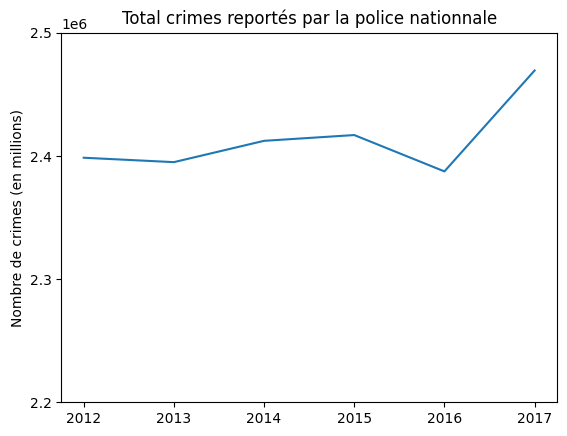

In [8]:
# Visualisation des données
fig, ax = plt.subplots()
ax.plot(anneeFrame.index, anneeFrame.values)
plt.yticks(np.arange(2200000, 2600000, 100000))
ax.set_title('Total crimes reportés par la police nationnale')
ax.set_ylabel('Nombre de crimes (en millions)')
plt.savefig('PoliceGraph.png', transparent=False)
plt.show()